In [25]:
import csv
import numpy as np
import pandas as pd

In [26]:
train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [27]:
sentences = []
for i in range(0,len(train['id'])):
    x=''
    y=''
    if(train['keyword'][i]==train['keyword'][i]):
        x = train['keyword'][i].replace("%20"," ")
    if(train['location'][i]==train['location'][i]):
        y = train['location'][i]
    sentence = x + ' <EOS> ' + y + ' <EOS> ' + train['text'][i] + ' <EOS>'
    sentences += [sentence]

In [28]:
print(sentences[0:5])

[' <EOS>  <EOS> Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all <EOS>', ' <EOS>  <EOS> Forest fire near La Ronge Sask. Canada <EOS>', " <EOS>  <EOS> All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected <EOS>", ' <EOS>  <EOS> 13,000 people receive #wildfires evacuation orders in California  <EOS>', ' <EOS>  <EOS> Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  <EOS>']


In [29]:
y_train = []
for i in range(0,len(train['id'])):
    y_train += [[train['target'][i]]]
y_train = np.array(y_train)
print(y_train)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
# Model configuration
additional_metrics = ['accuracy']
batch_size = 5000
embedding_output_dims = 10
loss_function = BinaryCrossentropy()
max_sequence_length = 40
num_distinct_words = 300
number_of_epochs = 100
optimizer = Adam()
validation_split = 0.10
verbosity_mode = 1

In [32]:
tokenizer = Tokenizer(num_words=num_distinct_words, lower= 1, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [33]:
print(word_index)

{'<OOV>': 1, 'eos': 2, 'co': 3, 't': 4, 'http': 5, 'the': 6, 'a': 7, 'in': 8, 'to': 9, 'of': 10, 'and': 11, 'i': 12, 'is': 13, 'on': 14, 'for': 15, 'you': 16, 'my': 17, 'with': 18, 'it': 19, 'that': 20, 'at': 21, 'by': 22, 'this': 23, 'new': 24, 'from': 25, 'https': 26, 'be': 27, 'are': 28, 'up': 29, 'was': 30, 'have': 31, 'fire': 32, 'like': 33, 'amp': 34, 'me': 35, 'as': 36, 'but': 37, 'just': 38, 'so': 39, 'not': 40, 'your': 41, 'emergency': 42, 'usa': 43, 'out': 44, 'no': 45, 'all': 46, 'will': 47, 'after': 48, 'disaster': 49, 'an': 50, 'has': 51, "i'm": 52, 'when': 53, 'if': 54, 'body': 55, 'we': 56, 'get': 57, '2': 58, 'via': 59, 'now': 60, 'burning': 61, 'storm': 62, 'or': 63, 'more': 64, 'buildings': 65, 'about': 66, 'suicide': 67, 'news': 68, 'they': 69, 'california': 70, 'he': 71, 'people': 72, 'what': 73, 'one': 74, 'how': 75, 'been': 76, 'fires': 77, 'over': 78, 'who': 79, 'police': 80, "it's": 81, 'into': 82, "don't": 83, 'nuclear': 84, 'bomb': 85, 'do': 86, 'ca': 87, "'":

In [34]:
sequences = tokenizer.texts_to_sequences(sentences)
print(max([len(x) for x in sequences]))

41


In [35]:
test = pd.read_csv('test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [36]:
test_sentences = []
for i in range(0,len(test['id'])):
    x=''
    y=''
    if(test['keyword'][i]==test['keyword'][i]):
        x = test['keyword'][i].replace("%20"," ")
    if(test['location'][i]==test['location'][i]):
        y = test['location'][i]
    sentence = x + ' <EOS> ' + y + ' <EOS> ' + train['text'][i] + ' <EOS>'
    test_sentences += [sentence]

In [37]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
print(test_sequences[:20])

[[2, 2, 138, 1, 28, 6, 1, 10, 23, 171, 172, 1, 1, 98, 46, 2], [2, 2, 117, 32, 1, 1, 1, 1, 148, 2], [2, 2, 46, 1, 1, 9, 1, 8, 1, 28, 169, 1, 22, 1, 45, 1, 184, 63, 1, 8, 1, 1, 28, 1, 2], [2, 2, 1, 1, 72, 1, 1, 184, 1, 8, 70, 2], [2, 2, 38, 124, 1, 23, 1, 25, 1, 1, 36, 202, 25, 1, 1, 82, 7, 1, 2], [2, 2, 1, 1, 70, 1, 1, 1, 8, 1, 1, 1, 9, 1, 1, 32, 1, 1, 2], [2, 2, 161, 49, 1, 1, 1, 1, 175, 10, 1, 8, 1, 1, 1, 1, 2], [2, 2, 52, 14, 1, 10, 6, 1, 11, 12, 90, 133, 7, 32, 8, 6, 1, 2], [2, 2, 1, 50, 42, 184, 1, 60, 8, 6, 1, 1, 6, 1, 2], [2, 2, 52, 1, 20, 6, 1, 13, 1, 9, 138, 1, 2], [2, 2, 1, 72, 1, 25, 6, 209, 1, 39, 1, 2], [2, 2, 1, 188, 1, 13, 1, 1, 1, 1, 7, 1, 12, 1, 8, 188, 1, 73, 278, 12, 1, 86, 73, 278, 12, 1, 86, 1, 175, 2], [2, 2, 1, 175, 1, 1, 1, 1, 63, 1, 1, 1, 1, 1, 2], [2, 2, 161, 8, 1, 1, 56, 1, 1, 2], [2, 2, 149, 9, 1, 1, 14, 1, 8, 1, 158, 95, 1, 2], [1, 2, 106, 2, 1, 29, 129, 2], [1, 2, 1, 1, 1, 1, 1, 2, 12, 131, 1, 2], [1, 2, 1, 2, 1, 13, 1, 2], [1, 2, 1, 14, 1, 2, 17, 158, 13, 

In [38]:
padded = pad_sequences(sequences, padding='pre',maxlen =max_sequence_length, truncating = 'post')
print(padded.shape)
test_padded = pad_sequences(test_sequences, padding='pre',maxlen =max_sequence_length, truncating = 'post')
print(test_padded.shape)

(7613, 40)
(3263, 40)


In [39]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [40]:
padded_split_test = padded[6000:]
y_split_test = y_train[6000:]
padded = padded[:6000]
y_train = y_train[:6000]

In [41]:
# Disable eager execution
tf.compat.v1.disable_eager_execution()

In [43]:
# Define the Keras model
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(LSTM(10))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [44]:
# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [45]:
# Give a summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 10)            3000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 3,851
Trainable params: 3,851
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Train the model
history = model.fit(padded, y_train, batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

Train on 5400 samples, validate on 600 samples
Epoch 1/100
5400/5400 [==============================] - 0s 8us/sample - loss: 0.4618 - accuracy: 0.8076 - val_loss: 0.5416 - val_accuracy: 0.7233
Epoch 2/100
5400/5400 [==============================] - 0s 16us/sample - loss: 0.4617 - accuracy: 0.8093 - val_loss: 0.5439 - val_accuracy: 0.7183
Epoch 3/100
5400/5400 [==============================] - 0s 16us/sample - loss: 0.4640 - accuracy: 0.8041 - val_loss: 0.5508 - val_accuracy: 0.7183
Epoch 4/100
5400/5400 [==============================] - 0s 7us/sample - loss: 0.4684 - accuracy: 0.8044 - val_loss: 0.5407 - val_accuracy: 0.7167
Epoch 5/100
5400/5400 [==============================] - 0s 8us/sample - loss: 0.4614 - accuracy: 0.8094 - val_loss: 0.5358 - val_accuracy: 0.7350
Epoch 6/100
5400/5400 [==============================] - 0s 8us/sample - loss: 0.4658 - accuracy: 0.8094 - val_loss: 0.5348 - val_accuracy: 0.7383
Epoch 7/100
5400/5400 [==============================] - 0s 16us/samp

Epoch 56/100
5400/5400 [==============================] - 0s 12us/sample - loss: 0.4593 - accuracy: 0.8093 - val_loss: 0.5463 - val_accuracy: 0.7233
Epoch 57/100
5400/5400 [==============================] - 0s 8us/sample - loss: 0.4514 - accuracy: 0.8172 - val_loss: 0.5698 - val_accuracy: 0.7333
Epoch 58/100
5400/5400 [==============================] - 0s 8us/sample - loss: 0.4604 - accuracy: 0.8052 - val_loss: 0.5473 - val_accuracy: 0.7233
Epoch 59/100
5400/5400 [==============================] - 0s 7us/sample - loss: 0.4536 - accuracy: 0.8196 - val_loss: 0.5378 - val_accuracy: 0.7267
Epoch 60/100
5400/5400 [==============================] - 0s 7us/sample - loss: 0.4539 - accuracy: 0.8107 - val_loss: 0.5383 - val_accuracy: 0.7283
Epoch 61/100
5400/5400 [==============================] - 0s 11us/sample - loss: 0.4503 - accuracy: 0.8106 - val_loss: 0.5491 - val_accuracy: 0.7233
Epoch 62/100
5400/5400 [==============================] - 0s 17us/sample - loss: 0.4486 - accuracy: 0.8154 - v

In [55]:
# Test the model after training
test_results = model.evaluate(padded_split_test, y_split_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 0.6065756155701062 - Accuracy: 72.03967571258545%


In [56]:
import matplotlib.pyplot as plt

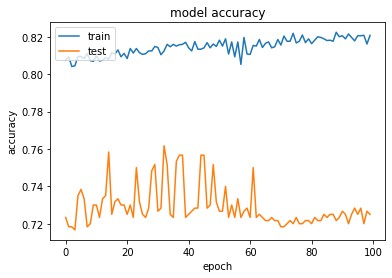

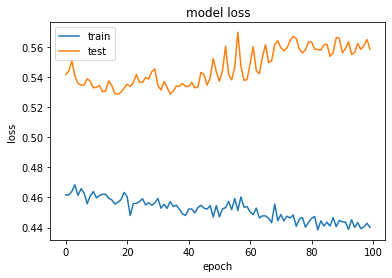

In [57]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Dropout=0.5

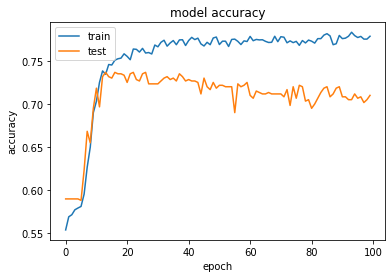

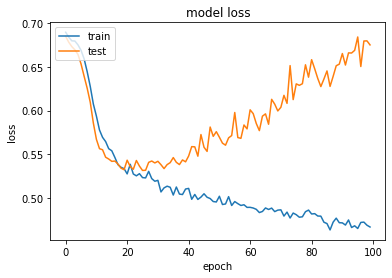

In [24]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Dropout=0.8

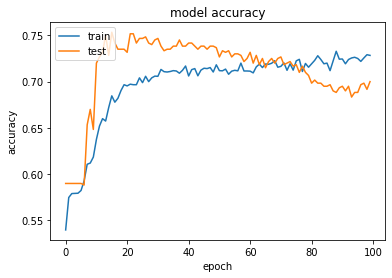

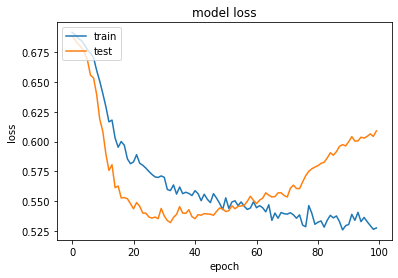

In [24]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Dropout=0.9

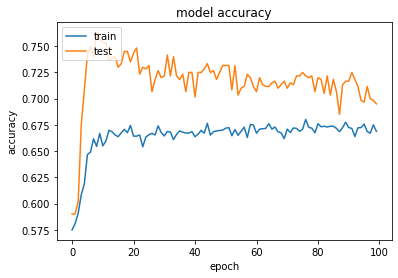

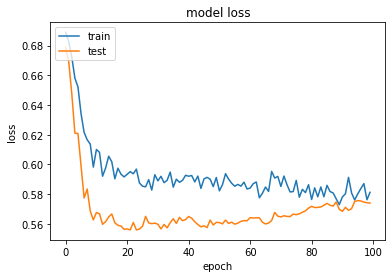

In [41]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Dropout=0.95